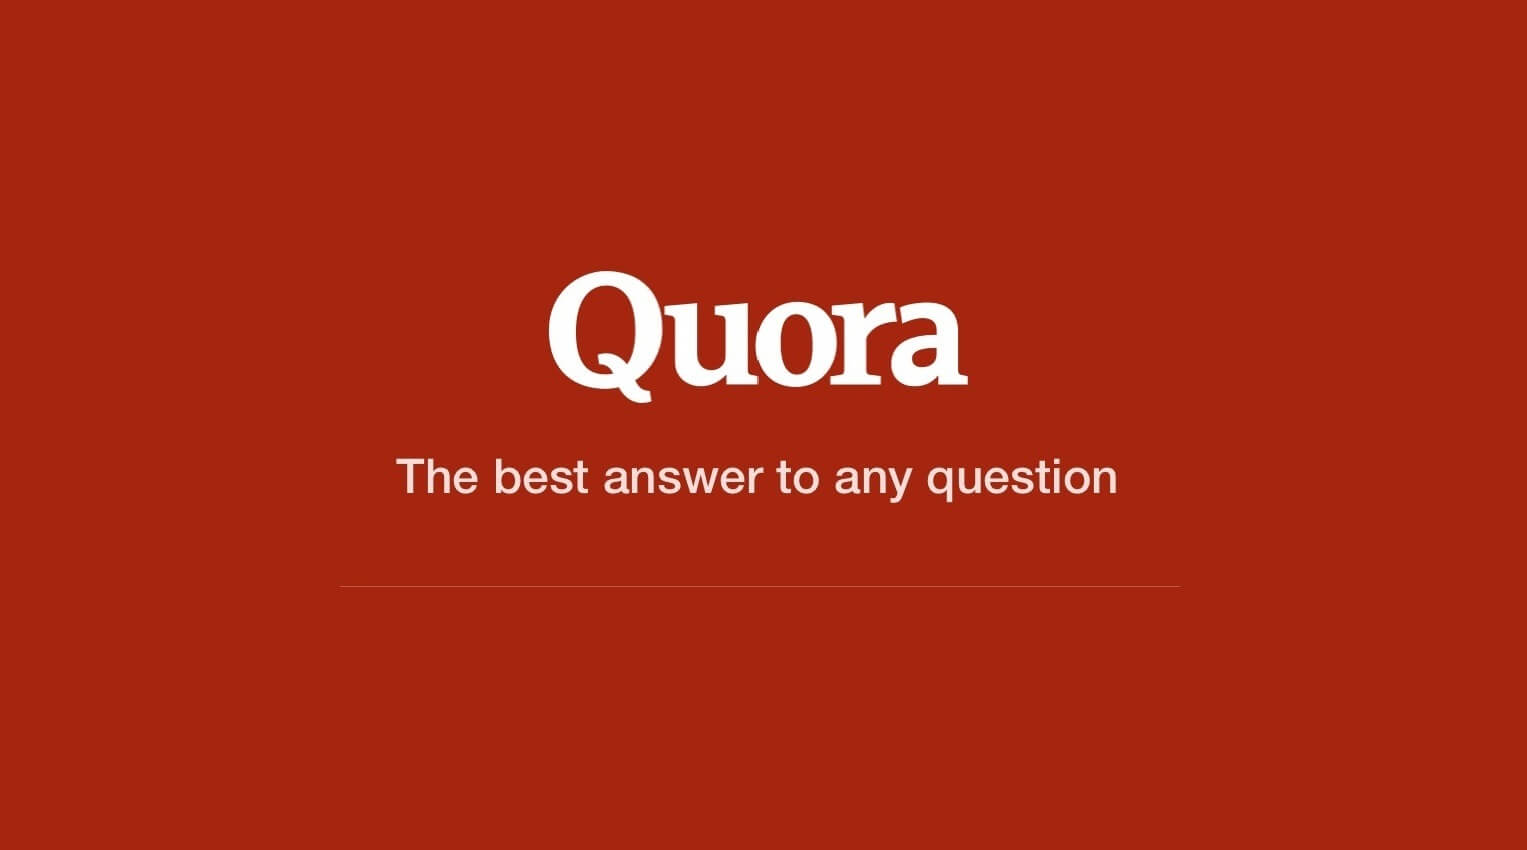

<h1 style="text-align:center;font-size:30px;" > Quora Question Pairs </h1>

<h1> 1. Business Problem </h1>

<h2> 1.1 Description </h2>

<p>Quora is a place to gain and share knowledge—about anything. It’s a platform to ask questions and connect with people who contribute unique insights and quality answers. This empowers people to learn from each other and to better understand the world.</p>
<p>
Over 100 million people visit Quora every month, so it's no surprise that many people ask similarly worded questions. Multiple questions with the same intent can cause seekers to spend more time finding the best answer to their question, and make writers feel they need to answer multiple versions of the same question. Quora values canonical questions because they provide a better experience to active seekers and writers, and offer more value to both of these groups in the long term.
</p>
<br>
> Credits: Kaggle 


__ Problem Statement __
- Identify which questions asked on Quora are duplicates (or slightly differently worded) of questions that have already been asked. This improves the customer experiance .  
- This could be useful to merge the questions and instantly provide answers to questions that have already been answered. 
- We are tasked with predicting whether a pair of questions are duplicates or not. 

<h2> 1.2 Sources/Useful Links</h2>

- Source : https://www.kaggle.com/c/quora-question-pairs , we can get dataset and problem from this link.
<br><br>____ Useful Links ____
- Discussions : https://www.kaggle.com/anokas/data-analysis-xgboost-starter-0-35460-lb/comments
- Kaggle Winning Solution and other approaches: https://www.dropbox.com/sh/93968nfnrzh8bp5/AACZdtsApc1QSTQc7X0H3QZ5a?dl=0
- Blog 1 : https://engineering.quora.com/Semantic-Question-Matching-with-Deep-Learning
- Blog 2 : https://towardsdatascience.com/identifying-duplicate-questions-on-quora-top-12-on-kaggle-4c1cf93f1c30

<h2>1.3 Real world/Business Objectives and Constraints </h2>

1. The cost of a mis-classification can be very high. So we have to minimize it. 
2. You would want a probability of a pair of questions to be duplicates so that you can choose any threshold of choice.
3. Here we should get a probability that, given Que 1 is similar to Que 2 and probability lies between 0 and 1. If the probabaility is greater than choosen threshold probability, then merge the answers for those questions.
3. No strict latency concerns.
4. Interpretability is partially important to understand why questions are merged

### Quora question pair productionization:-

1. Given a pair of questions we determine whether they are duplicates or not . 

In productionizations, 

2. There will be millions of questions and if we compare the question with these million questions, then we have to evaluate a million test points which are pairs of questions and it is very time taking.
3. So to solve this problem, given a new question, instead of comparing it with all the million questions, we can decrease the set of questions we should compare it with. 
4. We can use simple fast searching scheme tool, we can break up millions of questions in database into list of most important words through similar word compitition through inverted indices. 
5. Google does this process of inverted indixes . It searhces similar questions using algorithms called inverted indixes. Inverted indexes are most used in text search systems in the world and it is very very fast.
6. inverted indixes method is depends on key words. So we try to find the particular key word in all the questions in database, for a particular given question and for matched words we give more importance .
7. There are variations of inverted indices like distributed inverted indixes etc., depending on dataset size. So with process, instead of comparing the question with all the questions in database, now we have subset of questions which is smaller and we compare the given question with this subset.
8. This method gradually reduces the question comparision from million comparisions to just few comparisions, by just comparing keywords. 
9. This is a optimization hack. There is no low latency requirments 

<h1>2. Machine Learning Probelm </h1>

<h2> 2.1 Data </h2>

<h3> 2.1.1 Data Overview </h3>

<p> 
1. Data will be in a file Train.csv <br>
2. Train.csv contains 5 columns : qid1, qid2, question1, question2, is_duplicate <br> . is_dupliate is Yi here which belongs to {0,1}, and using qid1 ,qid2, question1, question2 we can construct Xi. We have to find whether the question is duplicate or not. 
3. If is_duplicate = 0, that means the questions are not duplicates. If is_duplicate = 1, then questions are duplicates.<br>
4. Size of Train.csv - 60MB <br>
5. Number of rows in Train.csv = 404,290
</p>

Class 0 = questions are not duplicates

Class 1 = questions are duplicates

<h3> 2.1.2 Example Data point </h3>

<pre>
"id","qid1","qid2","question1","question2","is_duplicate"
"0","1","2","What is the step by step guide to invest in share market in india?","What is the step by step guide to invest in share market?","0"
"1","3","4","What is the story of Kohinoor (Koh-i-Noor) Diamond?","What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?","0"
"7","15","16","How can I be a good geologist?","What should I do to be a great geologist?","1"
"11","23","24","How do I read and find my YouTube comments?","How can I see all my Youtube comments?","1"
</pre>

<h2> 2.2 Mapping the real world problem to an ML problem </h2>

<h3> 2.2.1 Type of Machine Leaning Problem </h3>

1. It is a binary classification problem, for a given pair of questions we need to predict if they are duplicate or not. 
2. We have to featurize the data to determine whether the questions are duplicate or not. This is binary classification problem.

<h3> 2.2.2 Performance Metric </h3>

##### Source: https://www.kaggle.com/c/quora-question-pairs#evaluation

##### Metric(s): 
* log-loss : https://www.kaggle.com/wiki/LogarithmicLoss . It is the metric for this problem. Here though it is a binary classification problem, we dont want output to be just 0 or 1. 
* We want probability value which lies between 0 to 1 , to determine whether the question is duplicate or not. So when we take probability value, then log loss is one of the best metric. 
* Log-loss is the primary KPI - Key Performance Indicator
* Binary Confusion Matrix . This is secondary performance metric, where we can compute precision , recall, TPR, TNR, FPR, FNR

<h2> 2.3 Train and Test Construction </h2>

<p>  </p>
1. We build train and test by randomly splitting in the ratio of 70:30 or 80:20 whatever we choose as we have sufficient points to work with. 
2. The model is built based on present day questions. If we give any new question for this model, then it determines whether this question is duplicate of already answered  question. 
3. Type of Questions asked change over time.  And model also should change over time. So if we had a time stamp for each of question pairs then we can break the dataset based on time axis and sorted based on time and take the oldest 70% data as train data and newest 30% as test data. And this best way to split due to data change over time.
4. But here dont have time stamp and so we can't do temporal splitting. 
5. So we can just randomly split train and test data. 

<h1>3. Exploratory Data Analysis </h1>

In [4]:
# LOading the libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.plotly as py
import os
import gc

import re
from nltk.corpus import stopwords
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup

# Loading libraries
# https://pypi.org/project/fuzzywuzzy/
from fuzzywuzzy import fuzz
from sklearn.manifold import TSNE
# Import the Required lib packages for WORD-Cloud generation
# https://stackoverflow.com/questions/45625434/how-to-install-wordcloud-in-python3-6
from wordcloud import WordCloud, STOPWORDS
from os import path
from PIL import Image

from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import plotly 
import plotly.plotly as py

<h2> 3.1 Reading data and basic stats </h2>

In [5]:
# loading the csv fine data to a dataframe
#df = pd.read_csv("train.csv") 
df = pd.read_csv('train.csv')
print("Number of data points:",df.shape[0])

Number of data points: 404290


In [6]:
# printing top 5 rows in the file
# qid1 is question id of question 1.
# qid2 is question id of question 2
# is_duplicate is class label with 2 classes {0,1}

df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [7]:
# Prints information of all columns
# question 2 has 2 null objects as it has 2 points less than total points.
# question 1 has 1 null value.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404289 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


#### Observation:-

We are given a minimal number of data fields here, consisting of:

- id:  Looks like a simple rowID
- qid{1, 2}:  The unique ID of each question in the pair
- question{1, 2}:  The actual textual contents of the questions.
- is_duplicate:  The label that we are trying to predict - whether the two questions are duplicates of each other or not.

<h3> 3.2.1 Distribution of data points among output classes</h3>
- Number of duplicate(smilar) and non-duplicate(non similar) questions

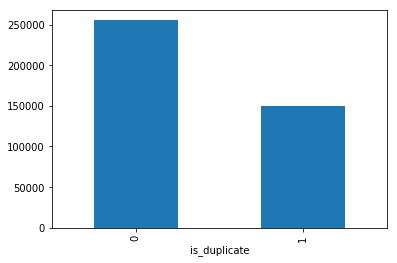

In [14]:
df.groupby("is_duplicate")['id'].count().plot.bar()

In [10]:
print('-> Total number of question pairs for training:\n   {}'.format(len(df)))

-> Total number of question pairs for training:
   404290


In [11]:
# checking the percentage of duplicate and non duplicate questions
print('-> Question pairs are not Similar (is_duplicate = 0):\n   {}%'.format(100 - round(df['is_duplicate'].mean()*100, 2)))
print('\n-> Question pairs are Similar (is_duplicate = 1):\n   {}%'.format(round(df['is_duplicate'].mean()*100, 2)))

-> Question pairs are not Similar (is_duplicate = 0):
   63.08%

-> Question pairs are Similar (is_duplicate = 1):
   36.92%


<h3> 3.2.2 Number of unique questions </h3>

In [12]:
# Each of data points is a pair of questions (Q1,Q2) with class label 0 or 1 (1 = similar/duplicate, 0 = not duplicate),
# Q1 can repeat with other combination of questions , Q2 also can repeat with combination of other questions.

qids = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
# unique questions
unique_qs = len(np.unique(qids))
# unique questions which appears more than once
qs_morethan_onetime = np.sum(qids.value_counts() > 1)
print('Total number of  Unique Questions are: {}\n'.format(unique_qs))
#print len(np.unique(qids))

print('Number of unique questions that appear more than one time/once: {} ({}%)\n'.format(qs_morethan_onetime, qs_morethan_onetime/unique_qs*100))

print('Max number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

q_vals=qids.value_counts()

q_vals=q_vals.values

Total number of  Unique Questions are: 537933

Number of unique questions that appear more than one time/once: 111780 (20.77953945937505%)

Max number of times a single question is repeated: 157



#### Observations:-

1. From the above output we can say that there are 537933 unique questions
2. Number of unique questions that appear more than one time are 111780 that is 20%  of total questions. 80% of remaining questions occur only once. That means majority of questions occur only once.
3. There is one question that appears 157 times , which is the largest number of times any question occurs .

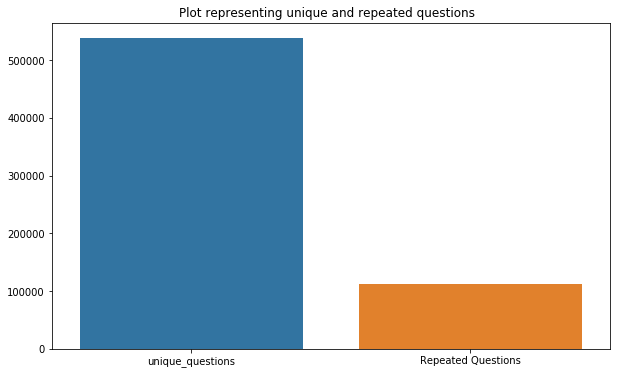

In [13]:
# Plot which shows how many unique questions are there and how many number of repeated questions.
x = ["unique_questions" , "Repeated Questions"]
y =  [unique_qs , qs_morethan_onetime]

plt.figure(figsize=(10, 6))
plt.title ("Plot representing unique and repeated questions  ")
sns.barplot(x,y)
plt.show()

#### Observations:-

1. We can observe 80% are unique questions and 20% are repeated questions

<h3>3.2.3 Checking for Duplicates </h3>

In [15]:
#checking whether there are any repeated pair of questions./ duplicate rows
# Same questions can be paired with different questions then it is not repeated pair

pair_duplicates = df[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count().reset_index()

print ("Number of duplicate questions pairs",(pair_duplicates).shape[0] - df.shape[0])

Number of duplicate questions pairs 0


<h3> 3.2.4 Number of occurrences of each question </h3>

Maximum number of times a single question is repeated: 157



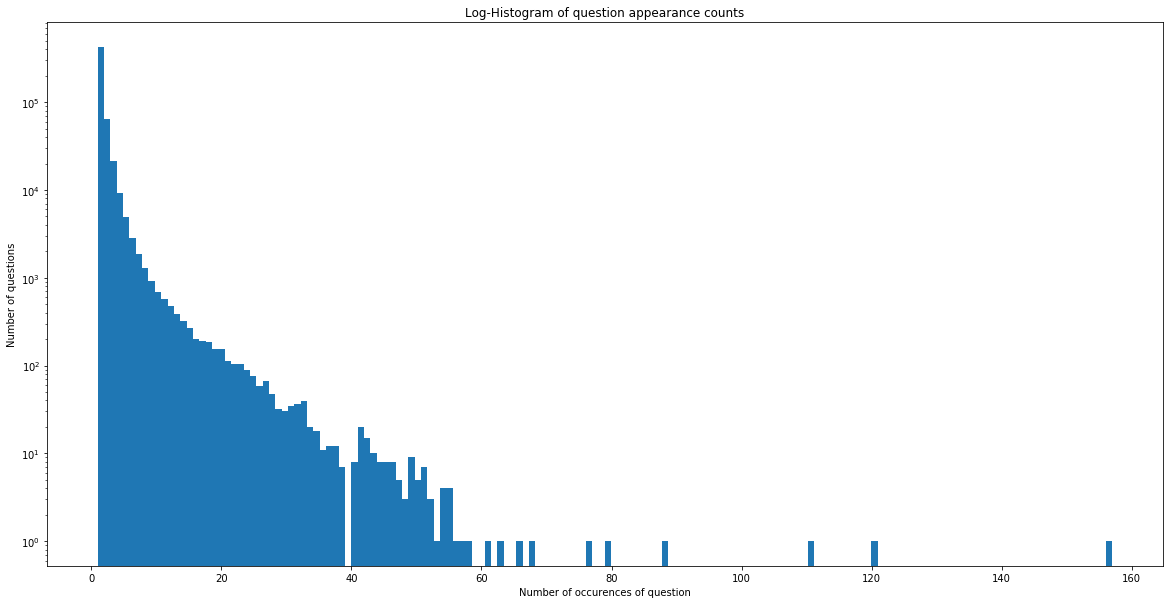

In [16]:
# This is like histogram  plot
# Y-axis is logarithmic axis where 10^0 = 1, 10^1= 10, 10^2=100, 10^3=1000, 10^4=10000, 10^5=100000

plt.figure(figsize=(20, 10))

plt.hist(qids.value_counts(), bins=160)

plt.yscale('log', nonposy='clip')

plt.title('Log-Histogram of question appearance counts')

plt.xlabel('Number of occurences of question')

plt.ylabel('Number of questions')

print ('Maximum number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

#### Observations:- 

1. Number of questions which occur only once are maximum, 80% of questions don't repeat.
2. There is one que that occurs 157 times which is highest.
3. Most of the questions occur between 0 to 40 occurances. 

<h3> 3.2.5 Checking for NULL values </h3>

In [17]:
#Checking whether there are any rows with null values. There are 2 questions which have null/NAN 
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

            id    qid1    qid2                         question1  \
105780  105780  174363  174364    How can I develop android app?   
201841  201841  303951  174364  How can I create an Android app?   
363362  363362  493340  493341                               NaN   

                                                question2  is_duplicate  
105780                                                NaN             0  
201841                                                NaN             0  
363362  My Chinese name is Haichao Yu. What English na...             0  


#### Observation:- 

1. There are two rows with null values in question2 
2. There is one row with null values in question 1

In [18]:
# For cleaning up of null values or NAN values, we do Filling / Replacing the null values with ' ' empty string. 
# so that there are no null values 

df = df.fillna('')
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


<h2>3.3 Basic Feature Extraction (before cleaning) </h2>

1. This is high-level basic feature extraction

Let us now construct a few features like:
 - ____freq_qid1____ = Frequency of qid1's . frequency means number of times a question occurs
 - ____freq_qid2____ = Frequency of qid2's 
 - ____q1len____ = Length of q1 . This is string length of questions
 - ____q2len____ = Length of q2
 - ____q1_n_words____ = Number of words in Question 1
 - ____q2_n_words____ = Number of words in Question 2
 - ____word_Common____ = (Number of common unique words in Question 1 and Question 2) . If there are more commoon words then questions can be duplicate. 
 - ____word_Total____ =(Total num of words in Question 1 + Total num of words in Question 2)
 - ____word_share____ = (word_common)/(word_Total)
 - ____freq_q1+freq_q2____ = sum total of frequency of qid1 and qid2 
 - ____freq_q1-freq_q2____ = absolute difference of frequency of qid1 and qid2 

In [19]:
if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    df = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    df['freq_qid1'] = df.groupby('qid1')['qid1'].transform('count') 
    df['freq_qid2'] = df.groupby('qid2')['qid2'].transform('count')
    df['q1len'] = df['question1'].str.len() 
    df['q2len'] = df['question2'].str.len()
    df['q1_n_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
    df['q2_n_words'] = df['question2'].apply(lambda row: len(row.split(" ")))

    def normalized_word_Common(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)
    df['word_Common'] = df.apply(normalized_word_Common, axis=1)

    def normalized_word_Total(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * (len(w1) + len(w2))
    df['word_Total'] = df.apply(normalized_word_Total, axis=1)

    def normalized_word_share(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)/(len(w1) + len(w2))
    df['word_share'] = df.apply(normalized_word_share, axis=1)

    df['freq_q1+q2'] = df['freq_qid1']+df['freq_qid2']
    df['freq_q1-q2'] = abs(df['freq_qid1']-df['freq_qid2'])

    df.to_csv("df_fe_without_preprocessing_train.csv", index=False)

df.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


<h3> 3.3.1 Analysis of some of the extracted features </h3>

- Here are some questions have only one single words.

In [20]:
print ("Minimum length of the questions in question1 : " , min(df['q1_n_words']))

print ("Minimum length of the questions in question2 : " , min(df['q2_n_words']))

print ("Number of Questions with minimum length [question1] :", df[df['q1_n_words']== 1].shape[0])
print ("Number of Questions with minimum length [question2] :", df[df['q2_n_words']== 1].shape[0])

Minimum length of the questions in question1 :  1
Minimum length of the questions in question2 :  1
Number of Questions with minimum length [question1] : 67
Number of Questions with minimum length [question2] : 24


<h4> 3.3.1.1 Feature: word_share </h4>

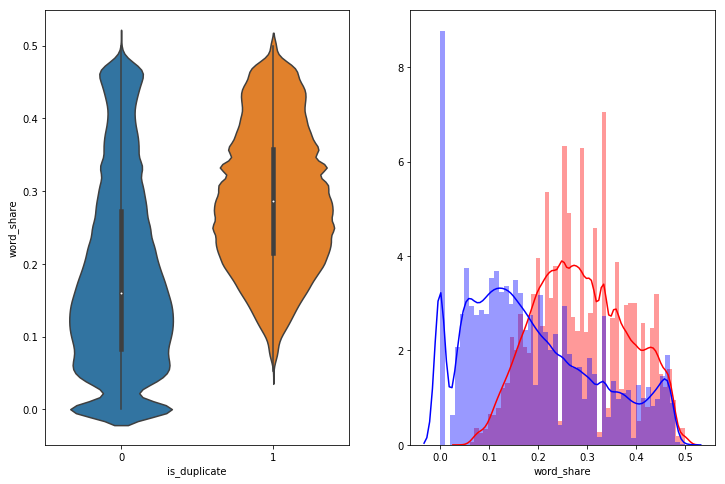

In [21]:
# 1 = duplicates
# 0 = not duplicates
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_share', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_share'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_share'][0:] , label = "0" , color = 'blue' )
plt.show()

#### Observations :-
1. This plot is the distribution of 2 classes {0,1} and there 2 types of plots - PDF's and Violin plot . blue color = word share of class 0 , red color = word share of class 1.
2. As the word_share increases there is higher chance that the questions are duplicates. The less the overlap between the 2 distributions , the better is the feature.
3. There is overlap between the points in PDF plot. Box plots in violin plot are not perfectly overlapping , so it has some values to differentiate 2 classes.

- The distributions for normalized word_share have some overlap on the far right-hand side, i.e., there are quite a lot of questions with high word similarity
- The average word share and Common no. of words of qid1 and qid2 is more when they are duplicate(Similar)

<h4> 3.3.1.2 Feature: word_Common </h4>

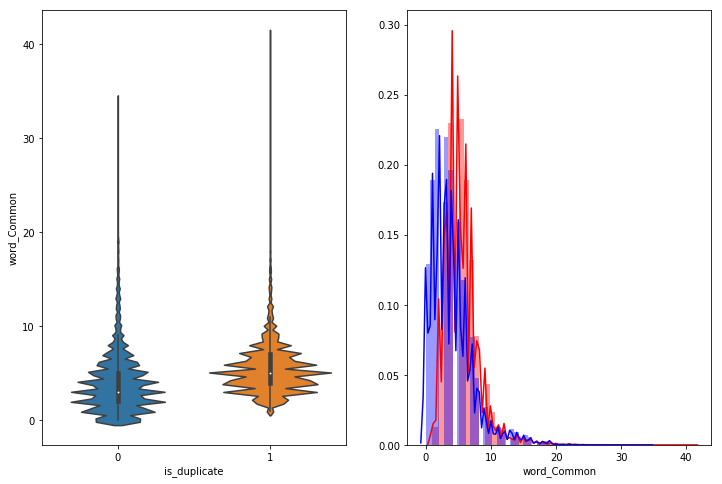

In [22]:

plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_Common', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_Common'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_Common'][0:] , label = "0" , color = 'blue' )
plt.show()

#### Observations:-
Blue = class 0 , red = class 1

1. The PDF plot is harder to interpret and violin plots are better.
2. If there is more overlap between the boxplots in violin plot, the worse the feature is. There is more overlap between the 2 box plots in violin plot.
3. The distributions of the word_Common feature in similar and non-similar questions are highly overlapping .

## EDA: Advanced Feature Extraction

In [23]:
#https://stackoverflow.com/questions/12468179/unicodedecodeerror-utf8-codec-cant-decode-byte-0x9c
if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    df = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
    df = df.fillna('')
    df.head()
else:
    print("get df_fe_without_preprocessing_train.csv from drive or run the previous notebook")

In [24]:
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3


## 3.4 Preprocessing of Text

##### Preprocessing:

1. Removing html tags . To remove html tags we can use Regular expressions
2. Removing Punctuations
3. Performing stemming
4. Removing Stopwords
5. Expanding contractions etc. Eg:- In place of '%' symbol we place with 'percent' , "he's" is replaced by 'he is' and so on.


Porter stemmer is popular stemming algorithms. It produces morphological variants of a root/base word.

A stemming algorithm reduces the words “chocolates”, “chocolatey”, “choco” to the root word, “chocolate” and “retrieval”, “retrieved”, “retrieves” reduce to the stem “retrieve”.

In [28]:
import warnings
warnings.filterwarnings("ignore")

In [29]:
# To get the results in 4 decemal points
# Beautiful soup is used to Remove all tags from a string 
# reference -- https://stackoverflow.com/questions/16206380/python-beautifulsoup-how-to-remove-all-tags-from-an-element
import warnings
warnings.filterwarnings("ignore")
import nltk
nltk.download('stopwords')
SAFE_DIV = 0.0001 

STOP_WORDS = stopwords.words("english")


def preprocess(x):
    x = str(x).lower()
    # m = million , k = thousand   , 000000 is replaced with 'm' and 000 is replaced with 'k'
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)   # regular expressions
    x = re.sub(r"([0-9]+)000", r"\1k", x) 
    
    
    porter = PorterStemmer()   
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x)
        x = example1.get_text()
               
    
    return x
    

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/pavana_paradesi5/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 3.5 Advanced Feature Extraction (NLP and Fuzzy Features) 

##### Definition:

- __Token__: You get a token by splitting sentence by a space
- __Stop_Word__ : stop words as per NLTK. Eg:- of, if,. etc
- __Word__ : A token that is not a stop_word

4. CWC- Common Word Count , CSC - Common Stopword Count

##### Features:

There are total of 15 features

word is a token but not a stop word. So we take common words in both questions and take common word count and divide it by minimum of length of q1 words and w2 words

- __cwc_min__  : Ratio of common_word_count to min lenghth of word count of Q1 and Q2 <br>
   cwc_min = common_word_count / (min(len(q1_words), len(q2_words))
   

- __cwc_max__  : Ratio of common_word_count to max lenghth of word count of Q1 and Q2 <br>
   cwc_max = common_word_count / (max(len(q1_words), len(q2_words))
   

Here we take stop word count

- __csc_min__  : Ratio of common_stop_count to min lenghth of stop count of Q1 and Q2 <br>
   csc_min = common_stop_count / (min(len(q1_stops), len(q2_stops))
   

- __csc_max__  : Ratio of common_stop_count to max lenghth of stop count of Q1 and Q2 <br>
   csc_max = common_stop_count / (max(len(q1_stops), len(q2_stops))
   
   
We take token count. we get token by breaking string with spaces 

- __ctc_min__ : Ratio of common_token_count to min lenghth of token count of Q1 and Q2 <br>
   ctc_min = common_token_count / (min(len(q1_tokens), len(q2_tokens))


- __ctc_max__ : Ratio of common_token_count to max lenghth of token count of Q1 and Q2 <br>
   ctc_max = common_token_count / (max(len(q1_tokens), len(q2_tokens))

##### Last word equal

If the last word in both the questions is same then it returns 1 otherwise 0. It is a boolean feature

- __last_word_eq__ : Check if Last word of both questions is equal or not  <br>
   last_word_eq = int(q1_tokens[-1] == q2_tokens[-1])

##### First word equal

- __first_word_eq__ : Check if First word of both questions is equal or not  <br>
   first_word_eq = int(q1_tokens[0] == q2_tokens[0])

##### Absolute length difference

It is defined as absolute value of the difference between the length of q1 tokens and q2 tokens

- __abs_len_diff__ : Abs. length difference <br>
   abs_len_diff = abs(len(q1_tokens) - len(q2_tokens))

##### Mean length

- __mean_len__ : Average Token Length of both Questions  <br>
   mean_len = (len(q1_tokens) + len(q2_tokens))/2



- __fuzz_ratio__  : https://github.com/seatgeek/fuzzywuzzy#usage http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/


- __fuzz_partial_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/


- __token_sort_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/


- __token_set_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/


##### Longest substring ratio:-

1. Longest common substring/tokens is taken from both questions / min of number of tokens in both questions.

- __longest_substr_ratio__ : Ratio of length longest common substring in both sentences/strings/questions to min lenghth of token count of Q1 and Q2.

    longest_substr_ratio = len(longest common substring) / (min(len(q1_tokens), len(q2_tokens))


## FuzzyWuzzy

1. The above defined 4 methods/strategies , fuzz_ratio, fuzz_partial_ratio, token_sort_ratio , token_set_ratio  are used to measure similarity between 2 sentences / questions. These strategies come up with similarity function 
2. Similarity lies between 0 to 100 . 100 = sentences are very similar . 0 = sentences are dissimilar / not similar.
3. Edit Distance can do multiple operations like adding a alphabet , delete an alphabet or shift an alphabet.
4. Edit distance between the 2 sentences is small if we can convert one sentence to other sentence by making very few edits. 
5. If the number of Edit operations between 2 sentences are very few, then the similarity between the 2 sentences will be high. 

##### Fuzz_ratio :-
Eg:- fuzz_ratio ("NEW YORK METS", "NEW YORK MEATS")- 96
1. In this eg if we give 2 sentences to fuzz_ratio then it gives the similarity value. Value close to 100 means the sentences are similar almost
2. Fuzz_ratio can sometimes cannot give the correct similarities . It caanot solve some problems and can give different results. 
3. So to solve problems in fuz__ratio, we define new metric called fuzz.partial_ratio.

#####  Fuzz.partial_ratio
1. It looks for a perfect partial string / sub string that matches perfectly in given sentences . If there is matching ,Then it gives fuzz.partial_ratio value which is high. So strings should partially match in this case.
2. This also have issues called Out of Order , where it looks for order, if the order is mismatched then it gives less value.
3. So to overcome this problem there is another feature called token_sort_ratio .

##### fuzz.token_sort_ratio :-
1. It takes the sentence , breaks into individual words and sort them in alphabetical order . Then give these changed sentences to fuzz.token_sort_ratio , then it gives high similarity value . 
2. THis also have some problems, so there comes token_set_ratio

##### fuzz.token_set_ratio
1. This takes sorted intersection of words in sentences.
2. So the process of this is, First we take sentences and so token sort and get new tokens T1,T2,  then we compute token set t0,t1,t2 

t0 = sorted_intersection <br>
t1 = sorted_intersection + sorted rest of words in String1 (remaining words) <br>
t2 = sorted_intersection + sorted rest of words in String2


Next we can compute fuzz_ratio of (t0,t1) , (t0,t2) , (t1,t2). fuzz_ratio of all possibilities is taken, and maximum value of these is taken and it is token_set_ratio value.

All the above features are important to compute similarity between 2 sentences.

In [30]:
def get_token_features(q1, q2):
    token_features = [0.0]*10
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features
    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    token_features[8] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    token_features[9] = (len(q1_tokens) + len(q2_tokens))/2
    return token_features

# get the Longest Common sub string

def get_longest_substr_ratio(a, b):
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)

def extract_features(df):
    # preprocessing each question
    df["question1"] = df["question1"].fillna("").apply(preprocess)
    df["question2"] = df["question2"].fillna("").apply(preprocess)

    print("token features...")
    
    # Merging Features with dataset
    
    token_features = df.apply(lambda x: get_token_features(x["question1"], x["question2"]), axis=1)
    
    df["cwc_min"]       = list(map(lambda x: x[0], token_features))
    df["cwc_max"]       = list(map(lambda x: x[1], token_features))
    df["csc_min"]       = list(map(lambda x: x[2], token_features))
    df["csc_max"]       = list(map(lambda x: x[3], token_features))
    df["ctc_min"]       = list(map(lambda x: x[4], token_features))
    df["ctc_max"]       = list(map(lambda x: x[5], token_features))
    df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
    df["first_word_eq"] = list(map(lambda x: x[7], token_features))
    df["abs_len_diff"]  = list(map(lambda x: x[8], token_features))
    df["mean_len"]      = list(map(lambda x: x[9], token_features))
   
    #Computing Fuzzy Features and Merging with Dataset
    
    # do read this blog: http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
    # https://stackoverflow.com/questions/31806695/when-to-use-which-fuzz-function-to-compare-2-strings
    # https://github.com/seatgeek/fuzzywuzzy
    print("fuzzy features..")

    df["token_set_ratio"]       = df.apply(lambda x: fuzz.token_set_ratio(x["question1"], x["question2"]), axis=1)
    # The token sort approach involves tokenizing the string in question, sorting the tokens alphabetically, and 
    # then joining them back into a string We then compare the transformed strings with a simple ratio().
    df["token_sort_ratio"]      = df.apply(lambda x: fuzz.token_sort_ratio(x["question1"], x["question2"]), axis=1)
    df["fuzz_ratio"]            = df.apply(lambda x: fuzz.QRatio(x["question1"], x["question2"]), axis=1)
    df["fuzz_partial_ratio"]    = df.apply(lambda x: fuzz.partial_ratio(x["question1"], x["question2"]), axis=1)
    df["longest_substr_ratio"]  = df.apply(lambda x: get_longest_substr_ratio(x["question1"], x["question2"]), axis=1)
    return df


In [32]:
if os.path.isfile('nlp_features_train.csv'):
    df = pd.read_csv("nlp_features_train.csv",encoding='latin-1')
    df.fillna('')
else:
    print("Extracting features for train:")
    df = pd.read_csv("train.csv")
    df = extract_features(df)
    df.to_csv("nlp_features_train.csv", index=False)
df.head(2)

Extracting features for train:
token features...
fuzzy features..


,id,qid1,qid2,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,0.999980,0.833319,0.999983,0.999983,...,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,0.799984,0.399996,0.749981,0.599988,...,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154


## 3.5.1 Analysis of extracted features


### 3.5.1.1 Plotting Word clouds

- Creating Word Cloud of Duplicates and Non-Duplicates Question pairs
- We can observe the most frequent occuring words
- Word clouds are plotted to find specific words that we find more often in duplicate questions and less often in non-duplicate questions.
- Some words occur more often in class 1 as compared to class 0 and vice versa


In [33]:
# https://stackoverflow.com/questions/49684095/python-unicodeencodeerror-charmap-codec-cant-encode-characters-in-position

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

df_duplicate = df[df['is_duplicate'] == 1]
dfp_nonduplicate = df[df['is_duplicate'] == 0]

# Converting 2d array of q1 and q2 and flatten the array: like {{1,2},{3,4}} to {1,2,3,4}
p = np.dstack([df_duplicate["question1"], df_duplicate["question2"]]).flatten()
n = np.dstack([dfp_nonduplicate["question1"], dfp_nonduplicate["question2"]]).flatten()

print ("Number of data points in class 1 (duplicate pairs) :",len(p))
print ("Number of data points in class 0 (non duplicate pairs) :",len(n))

#Saving the np array into a text file
np.savetxt('train_p.txt', p, delimiter=' ', encoding="utf-8", fmt='%s')
np.savetxt('train_n.txt', n, delimiter=' ', encoding="utf-8", fmt='%s')

Number of data points in class 1 (duplicate pairs) : 298526
Number of data points in class 0 (non duplicate pairs) : 510054


In [34]:
# reading the text files and removing the Stop Words:
d = path.dirname('.')

# reference - https://stackoverflow.com/questions/27092833/unicodeencodeerror-charmap-codec-cant-encode-characters
# the encoding is changed to UTF-8 when using the file, so characters in UTF-8 are able to be converted to text, 
# instead of returning an error when it encounters a UTF-8 character that is not supported by the current encoding.
# ,encoding='utf-8'
textp_w = open(path.join(d, 'train_p.txt'),encoding='utf-8').read()
textn_w = open(path.join(d, 'train_n.txt'),encoding='utf-8').read()
stopwords = set(STOPWORDS)
stopwords.add("said")
stopwords.add("br")
stopwords.add(" ")
stopwords.remove("not")

stopwords.remove("no")
#stopwords.remove("good")
#stopwords.remove("love")
stopwords.remove("like")
#stopwords.remove("best")
#stopwords.remove("!")
print ("Total number of words in duplicate pair questions :",len(textp_w))
print ("Total number of words in non duplicate pair questions :",len(textn_w))

Total number of words in duplicate pair questions : 16109886
Total number of words in non duplicate pair questions : 33193067


### Word Clouds generated from duplicate pair question's text 

Word Cloud for Duplicate Question pairs


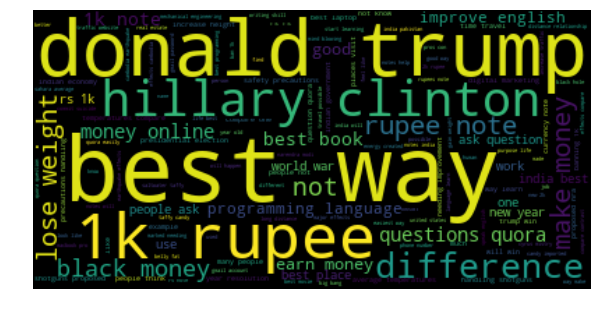

In [35]:
# 1 = duplicate pairs 

wc = WordCloud(background_color="black", max_words=len(textp_w), stopwords=stopwords)
wc.generate(textp_w)
print ("Word Cloud for Duplicate Question pairs")
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word Clouds generated from non duplicate pair question's text 

Word Cloud for non-Duplicate Question pairs:


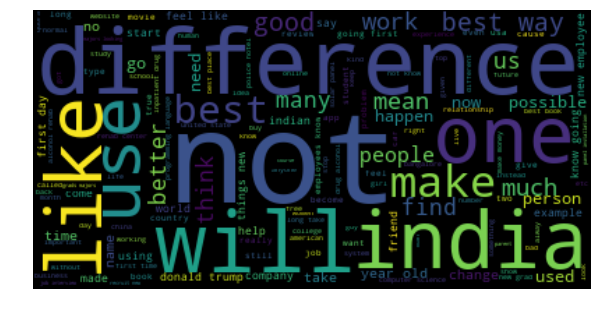

In [36]:
# 0 = non-duplicate pairs
wc = WordCloud(background_color="black", max_words=len(textn_w),stopwords=stopwords)
# generate word cloud
wc.generate(textn_w)
print ("Word Cloud for non-Duplicate Question pairs:")
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Observation:-

1. Some words occur more often in class 1 as compared to class 0 and vice versa. 
2. We can use TFIDF to count words

###  3.5.1.2 Pair plot of features ['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio']

0 = not duplicates

1 = duplicates


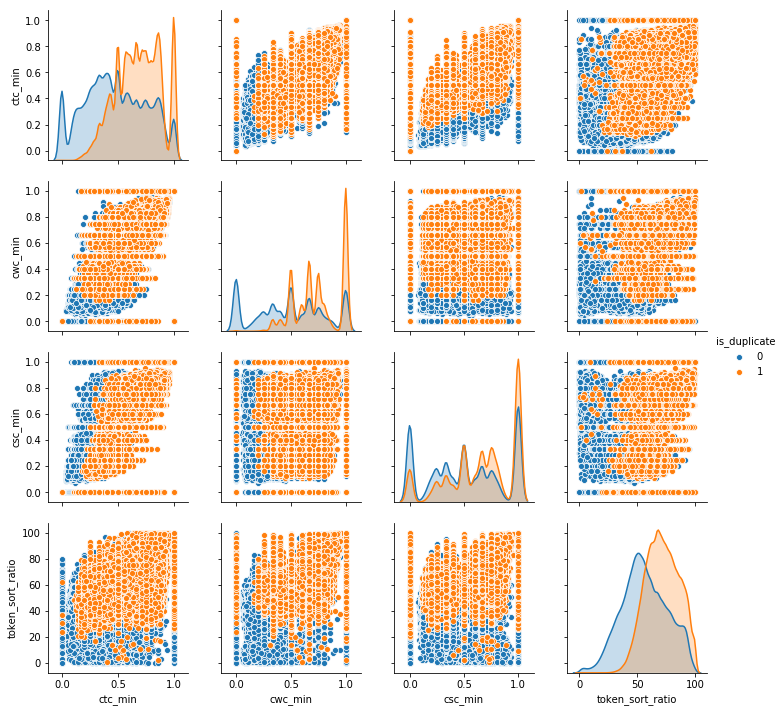

In [38]:
# These are pair plots  , orange color = class 1 , blue color = class 0
n = df.shape[0]
sns.pairplot(df[['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio', 'is_duplicate']][0:n], hue='is_duplicate', vars=['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'])
plt.show()

#### Observation:- 

1. In ctc_min , there are more of class = 1 occuring . csc_min also partially seperated between the classes 1 and 0. 
2. token_sort_ratio and csc_min also seperates classes well. 
3. All the features are useful as univariate features (single features) and bivariate features(pairs)

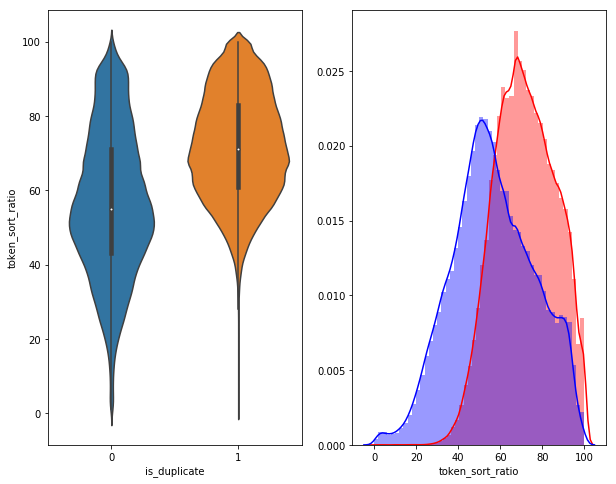

In [39]:
# Distribution of the feature token_sort_ratio . blue color = class 0 , orange color = class 1
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'token_sort_ratio', data = df[0:] , )

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['token_sort_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['token_sort_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

#### Observation :- 
1. In the above PDF ,there is overlap between points of both classes 0 and 1, but class 1 points have larger value of token_sort_ratio than class 0 points
2. In the violin plot, the box plots are not fully overlapping each other , so token_sort_ratio is a important feature for classification.

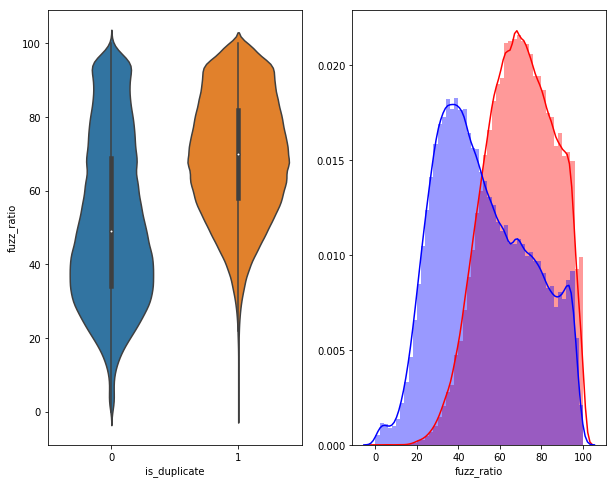

In [40]:
# Distribution of the feature - fuzz_ratio
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'fuzz_ratio', data = df[0:] , )

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['fuzz_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['fuzz_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

#### Observation:- 
1. Here also there is overlap between the classes but more points of class 1 have larger value of fuzz_ratio than points belonging to class 0
2. Violin plots are not fully overlapping . so feature fuzz_Ration is useful to determine the class label

Till here we have done univariate (trying to see in individual features are useful) and bi-variate analysis (pair plots to see if pairs of features are useful).

We can visualize data in all 15 features using techniques called T-SNE , to understand if in the high dim space of 15 features, if class 1 and class 0 points are seperated. 

## 3.5.2 Visualization

In [41]:
# Using TSNE for Dimentionality reduction of 15 Features(Generated after cleaning the data) to 3 dimention
# Our data is in 15 dimensions, so using TSNE we can project this into 2 dim dataset and can visualize this 2D dataset using a plot


dfp_subsampled = df[0:5000]  # taken subset of points as TSNE takes lot of time to run
X = MinMaxScaler().fit_transform(dfp_subsampled[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = dfp_subsampled['is_duplicate'].values

In [42]:
# we take only 2 dim with random initialization, run for 1000 iterations 
tsne2d = TSNE(
    n_components=2,   
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.019s...
[t-SNE] Computed neighbors for 5000 samples in 0.362s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.130446
[t-SNE] Computed conditional probabilities in 0.346s
[t-SNE] Iteration 50: error = 81.2911148, gradient norm = 0.0457501 (50 iterations in 2.699s)
[t-SNE] Iteration 100: error = 70.6044159, gradient norm = 0.0086692 (50 iterations in 1.858s)
[t-SNE] Iteration 150: error = 68.9124908, gradient norm = 0.0056016 (50 iterations in 1.765s)
[t-SNE] Iteration 200: error = 68.1010742, gradient norm = 0.0047585 (50 iterations in 1.843s)
[t-SNE] Iteration 250: error = 67.5907974, gradient norm = 0.0033576

### TSNE Plot

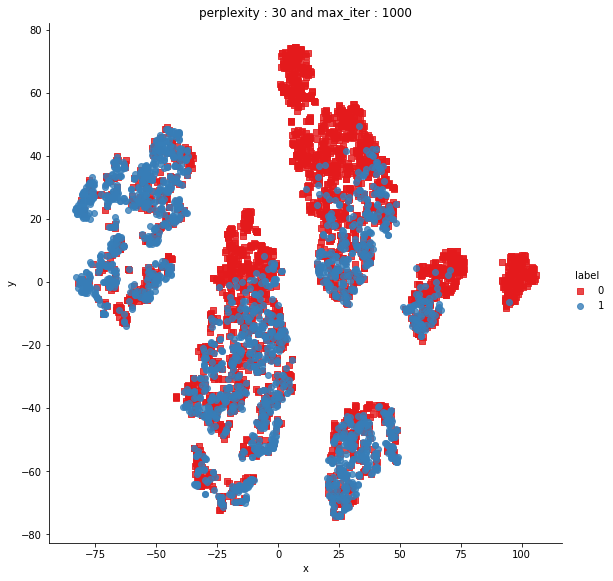

In [43]:
# 1 = duplicates , 0 = not duplicates

df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])
plt.title("perplexity : {} and max_iter : {}".format(30, 1000))
plt.show()

#### Observation:-

1. In this plot, we are visualizing 15 dim data as 2 dimensional data , and class 0 and class 1 points are clearly seperable in some cases.

In [44]:
from sklearn.manifold import TSNE
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.009s...
[t-SNE] Computed neighbors for 5000 samples in 0.364s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.130446
[t-SNE] Computed conditional probabilities in 0.318s
[t-SNE] Iteration 50: error = 80.5316772, gradient norm = 0.0296611 (50 iterations in 13.809s)
[t-SNE] Iteration 100: error = 69.3834763, gradient norm = 0.0033837 (50 iterations in 8.621s)
[t-SNE] Iteration 150: error = 67.9741974, gradient norm = 0.0017825 (50 iterations in 8.003s)
[t-SNE] Iteration 200: error = 67.4170685, gradient norm = 0.0011107 (50 iterations in 8.013s)
[t-SNE] Iteration 250: error = 67.1046600, gradient norm = 0.001052

In [45]:
# https://github.com/plotly/plotly.py/issues/860
# https://plot.ly/~pavanap/0/_3d-embedding-with-engineered-features/#/

import plotly 
import plotly.plotly as py
plotly.tools.set_credentials_file(username='pavanap', api_key='yKX7Kw2bjiLDUiFZ3xXA')

trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~pavanap/0 or inside your plot.ly account where it is named '3DBubble'
